# 1. Business Understanding

Uber Technologies Inc. is a San Francisco-based company founded in 2009. It has 91 million active users and 3.9 million drivers worldwide. The company is represented with its app in a total of 63 countries.
There must be a basic understanding of the objectives from the business perspective. This can then be applied to define appropriate data mining project requirements so that they can be realized. Uber tries to optimize forecasts based on supply and demand in such a way that an availability of vehicles is always guaranteed in order to maintain the service for its users. This dataset is intended to demonstrate the feasibility of this goal.

# 2. Data and Data Preparation

The dataset consists of four basic variables: dispatching base number, date, active_vehicles, and trips.
The dispatching base number variable is a code assigned by the TLC that indicates an Uber base in New York City. Accordingly, the codes can be assigned to the following bases: B02512: Under, B02598: Behind, B02617: Next, B02682: Taste, B02764: After-NY, B02765: Grun, B02835: Brazen, B02836: Inside.
By a first overview of the available data, one can already speculate about possible dependencies between the number of active vehicles, number of trips as well as the date.

## 2.1 Import of Relevant Modules

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
sns.set()
from sklearn.linear_model import LinearRegression

## 2.2 Read Data

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
raw_data =pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Forecast_of_required_vehicles_in_the_city_center_data.csv')

In [4]:
#Output record head
raw_data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [5]:
#data description
raw_data.describe(include='all')

,dispatching_base_number,date,active_vehicles,trips
count,354,354,354.000000,354.000000
unique,6,59,NaN,NaN
top,B02598,1/27/2015,NaN,NaN
freq,59,6,NaN,NaN
mean,NaN,NaN,1307.435028,11667.316384
std,NaN,NaN,1162.510626,10648.284865
min,NaN,NaN,112.000000,629.000000
25%,NaN,NaN,296.750000,2408.500000
50%,NaN,NaN,1077.000000,9601.000000
75%,NaN,NaN,1417.000000,13711.250000


## 2.3 Data Cleaning

In [6]:
#check null values
raw_data.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [7]:
raw_data.duplicated().sum()

0

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='active_vehicles', ylabel='Density'>

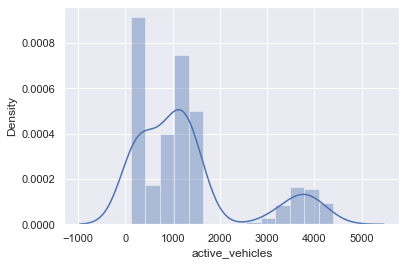

In [8]:
# View data distributions for active vehicles
sns.distplot(raw_data['active_vehicles'])

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trips', ylabel='Density'>

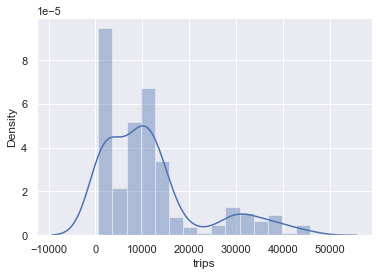

In [9]:
# View data distributions for trips
sns.distplot(raw_data['trips'])

In [10]:
#Here a 95% quantile is generated for active vehicles & trips
quant1= raw_data['active_vehicles'].quantile(0.95)
quant1

3904.7499999999986

In [11]:
quant1= raw_data['trips'].quantile(0.95)
quant1

36025.34999999999

In [12]:
#quantile containment for active_vehicles
data1= raw_data[raw_data['active_vehicles']<quant1]

In [13]:
#Quantile containment for trips

data1=raw_data[raw_data['trips']<quant1]

In [14]:
data1.describe(include='all')

,dispatching_base_number,date,active_vehicles,trips
count,336,336,336.000000,336.000000
unique,6,59,NaN,NaN
top,B02598,1/27/2015,NaN,NaN
freq,59,6,NaN,NaN
mean,NaN,NaN,1163.815476,10141.514881
std,NaN,NaN,1006.895472,8548.456980
min,NaN,NaN,112.000000,629.000000
25%,NaN,NaN,288.250000,2265.750000
50%,NaN,NaN,1056.500000,9467.500000
75%,NaN,NaN,1368.250000,12707.000000


/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='active_vehicles', ylabel='Density'>

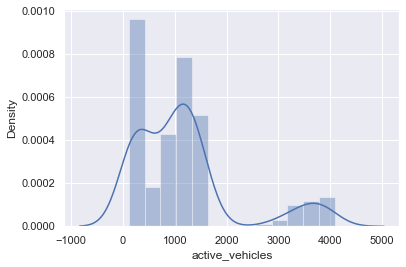

In [15]:
#Displot from the quantile is generated & the irregular distribution is still noticed
sns.distplot(data1['active_vehicles'])

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='active_vehicles', ylabel='Density'>

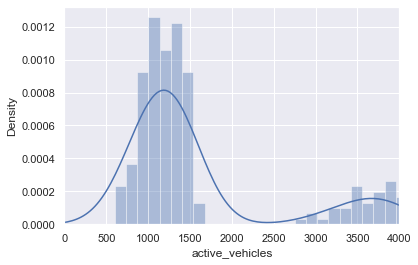

In [16]:
#Next step is to narrow down the values to 4000(active vehicles).
#On the left side you can see the main distribution of the dataset
data2= data1[data1['active_vehicles']<=4000]
data2= data1[data1['active_vehicles']>=600]
plt.xlim(0,4000)
sns.distplot(data2['active_vehicles'])

In [17]:
#here a quantile is created for number of trips
#data2= data1[data1['trips']<quant1]

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trips', ylabel='Density'>

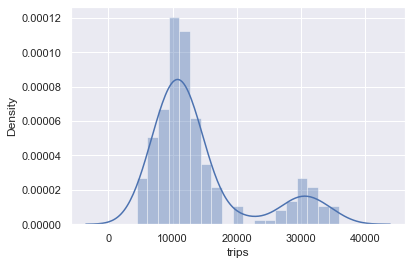

In [18]:
sns.distplot(data2['trips'])

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trips', ylabel='Density'>

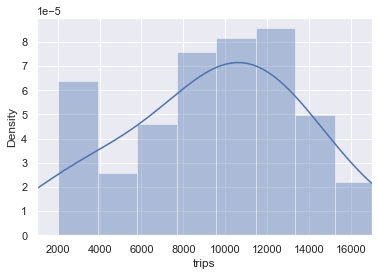

In [19]:
#Define value ranges
data2= data1[data1['trips']<=20000]
data2= data1[data1['trips']>=2000]
plt.xlim(1000,17000)
sns.distplot(data2['trips'])

# 3. Data Preparation

In [20]:
data_cleaned=pd.to_datetime(data2['date'])
data_cleaned=str(data2['dispatching_base_number'].astype(str))
#data_cleaned= data2["dispatching_base_number"].astype(str)
data_cleaned = data2.reset_index(drop=True)
data_cleaned.describe(include='all')

,dispatching_base_number,date,active_vehicles,trips
count,266,266,266.000000,266.000000
unique,6,59,NaN,NaN
top,B02598,2/5/2015,NaN,NaN
freq,59,6,NaN,NaN
mean,NaN,NaN,1411.646617,12414.560150
std,NaN,NaN,992.671651,8213.348133
min,NaN,NaN,236.000000,2016.000000
25%,NaN,NaN,925.500000,7620.500000
50%,NaN,NaN,1181.000000,10727.000000
75%,NaN,NaN,1439.500000,13842.500000


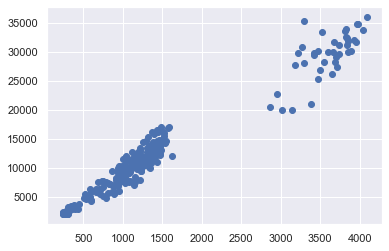

In [21]:
#After assuming that the data has been cleaned as far as possible, we continue with OLS assumptions.
#Before a scatter plot showing the split and density of the values
#Main feature: The data in the dataset are concentrated in the x=2000 & y= 20000 range
#However, values in the range of 3000 to over 4000 must also be included in the model
plt.scatter(data_cleaned['active_vehicles'], data_cleaned['trips'])

(0.0, 20000.0)

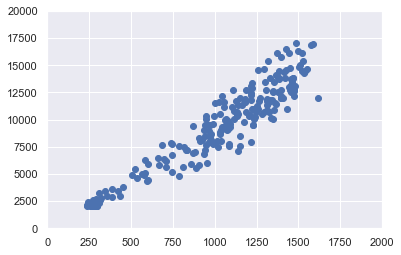

In [22]:
#Related to statement(s) from the line above.
#Main distribution here is in the 2000 range
plt.scatter(data_cleaned['active_vehicles'], data_cleaned['trips'])
plt.xlim(0,2000)
plt.ylim(0,20000)

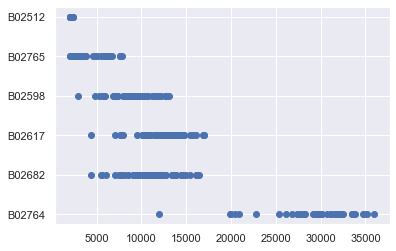

In [23]:
#A few more checks on the other variables
plt.scatter(data_cleaned['trips'], data_cleaned['dispatching_base_number'])

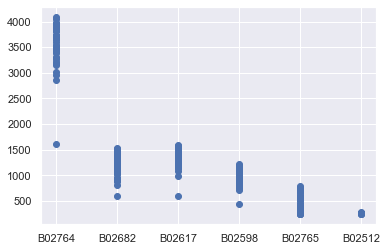

In [24]:
plt.scatter(data_cleaned['dispatching_base_number'], data_cleaned['active_vehicles'])

In [25]:
#Transformation für kontinuierliche Variablen
#Log: Die Logarithmentransformation hilft bei schiefen Daten, die Schiefe zu reduzieren. Siehe Oben

log_trips = np.log(data_cleaned['trips'])
data_cleaned['log_trips'] = log_trips


#Linearity is not present-> Violation of OLS Assumption

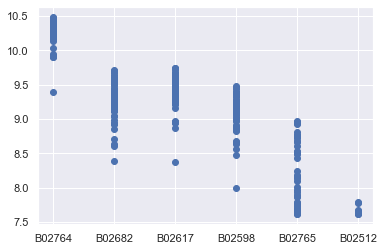

In [26]:
plt.scatter(data_cleaned['dispatching_base_number'], data_cleaned['log_trips'])

In [27]:
#Output of the new columns -> You can see that "Trips" occurs twice since log transformation
data_cleaned.columns.values

array(['dispatching_base_number', 'date', 'active_vehicles', 'trips',
       'log_trips'], dtype=object)

In [28]:
#data_cleaned = data_cleaned.drop(['trips'], axis=1)

In [29]:
#Variance Inflation Factor (VIF).
#If the VIF is between 5 and 10, multicolinearity is probably present and you should consider dropping the variable.

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['active_vehicles', 'log_trips']]
vif = pd.DataFrame()

vif["VIF"]= [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"]= variables.columns

In [30]:
#VIF is output and the values are <5 
vif

,VIF,Features
0,3.684423,active_vehicles
1,3.684423,log_trips


In [31]:
data_cleaned.describe(include='all')

,dispatching_base_number,date,active_vehicles,trips,log_trips
count,266,266,266.000000,266.000000,266.000000
unique,6,59,NaN,NaN,NaN
top,B02598,2/5/2015,NaN,NaN,NaN
freq,59,6,NaN,NaN,NaN
mean,NaN,NaN,1411.646617,12414.560150,9.208195
std,NaN,NaN,992.671651,8213.348133,0.697698
min,NaN,NaN,236.000000,2016.000000,7.608871
25%,NaN,NaN,925.500000,7620.500000,8.938593
50%,NaN,NaN,1181.000000,10727.000000,9.280516
75%,NaN,NaN,1439.500000,13842.500000,9.535498


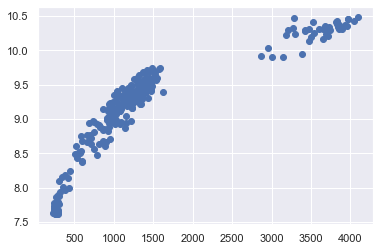

In [32]:
#Linearity could be improved by LOG transformation
plt.scatter(data_cleaned['active_vehicles'], data_cleaned['log_trips'])

## 3.1 Recoding of categorical variables

In [33]:
#Convert vpn categorical data into dummy/ indicator variables. Focus on base number for more general model
data_with_dummies = pd.get_dummies(data_cleaned, drop_first = True)

In [34]:
# Dummy variables head output
data_with_dummies.head()

,active_vehicles,trips,log_trips,dispatching_base_number_B02598,dispatching_base_number_B02617,dispatching_base_number_B02682,dispatching_base_number_B02764,dispatching_base_number_B02765,date_1/10/2015,date_1/11/2015,...,date_2/26/2015,date_2/27/2015,date_2/28/2015,date_2/3/2015,date_2/4/2015,date_2/5/2015,date_2/6/2015,date_2/7/2015,date_2/8/2015,date_2/9/2015
0,3427,29421,10.289464,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,945,7679,8.946245,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1228,9537,9.162934,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,870,6903,8.839711,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,785,4768,8.469682,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data_with_dummies.columns.values

array(['active_vehicles', 'trips', 'log_trips',
       'dispatching_base_number_B02598', 'dispatching_base_number_B02617',
       'dispatching_base_number_B02682', 'dispatching_base_number_B02764',
       'dispatching_base_number_B02765', 'date_1/10/2015',
       'date_1/11/2015', 'date_1/12/2015', 'date_1/13/2015',
       'date_1/14/2015', 'date_1/15/2015', 'date_1/16/2015',
       'date_1/17/2015', 'date_1/18/2015', 'date_1/19/2015',
       'date_1/2/2015', 'date_1/20/2015', 'date_1/21/2015',
       'date_1/22/2015', 'date_1/23/2015', 'date_1/24/2015',
       'date_1/25/2015', 'date_1/26/2015', 'date_1/27/2015',
       'date_1/28/2015', 'date_1/29/2015', 'date_1/3/2015',
       'date_1/30/2015', 'date_1/31/2015', 'date_1/4/2015',
       'date_1/5/2015', 'date_1/6/2015', 'date_1/7/2015', 'date_1/8/2015',
       'date_1/9/2015', 'date_2/1/2015', 'date_2/10/2015',
       'date_2/11/2015', 'date_2/12/2015', 'date_2/13/2015',
       'date_2/14/2015', 'date_2/15/2015', 'date_2/16/2015',
  

In [36]:
#Columns for the later model are provided
cols=['active_vehicles','log_trips','dispatching_base_number_B02598',
       'dispatching_base_number_B02617', 'dispatching_base_number_B02682',
       'dispatching_base_number_B02764', 'dispatching_base_number_B02765']

In [37]:
#-> At this point it was decided that the variable 'Date' is no longer useful and too costly for model building
#-> It is therefore not considered for the model

In [38]:
#Arrangement-> First column becomes target variable
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,active_vehicles,log_trips,dispatching_base_number_B02598,dispatching_base_number_B02617,dispatching_base_number_B02682,dispatching_base_number_B02764,dispatching_base_number_B02765
0,3427,10.289464,0,0,0,1,0
1,945,8.946245,0,0,1,0,0
2,1228,9.162934,0,1,0,0,0
3,870,8.839711,1,0,0,0,0
4,785,8.469682,1,0,0,0,0


## 3.2 Create Test and Training Data

In [40]:
targets = data_preprocessed['active_vehicles']
inputs = data_preprocessed.drop(['active_vehicles'], axis=1)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
input_scaled = scaler.transform(inputs)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.20, random_state=365)

# 4. Modelling and Evaluation

## 4.1 Linear Regression

In [44]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [45]:
y_hat = reg.predict(x_train)

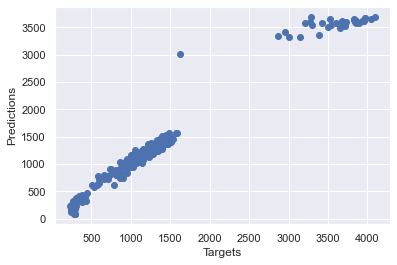

In [46]:
#The division of values is also noticeable here
plt.scatter(y_train, y_hat)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

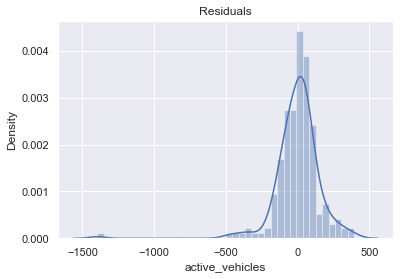

In [47]:
#Error thermal: Trainins values minus predicted data
sns.distplot(y_train - y_hat)
plt.title("Residuals")
#plt.show()

In [48]:
#R-squared value is important: variance of the target variable
reg.score(x_train, y_train)

0.9747815666217599

In [49]:
# Important for the regression line
reg.intercept_

1413.3913426862414

In [50]:
reg.score(x_test, y_test)

0.9849060957803961

In [51]:
print('training Performance')
print(reg.score(x_train,y_train))
print('test Performance')
print(reg.score(x_test,y_test))

training Performance
0.9747815666217599
test Performance
0.9849060957803961


In [52]:
#Regression coefficients for the model 
reg.coef_

array([432.4680536 , -55.50352875,  11.88834549, -20.8881854 ,
       611.37694067, -50.75412983])

In [53]:
#What weights are critical to the model:
reg_summary = pd.DataFrame(inputs.columns, columns = ['Features'])
reg_summary['Weights']= reg.coef_/1000
reg_summary

,Features,Weights
0,log_trips,0.432468
1,dispatching_base_number_B02598,-0.055504
2,dispatching_base_number_B02617,0.011888
3,dispatching_base_number_B02682,-0.020888
4,dispatching_base_number_B02764,0.611377
5,dispatching_base_number_B02765,-0.050754


In [54]:
#Testing the model

In [55]:
y_hat_test = reg.predict(x_test)

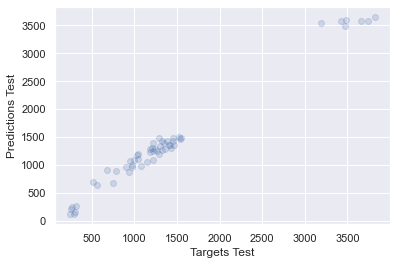

In [56]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets Test')
plt.ylabel('Predictions Test')
plt.show()

In [57]:
#Vprediction= has
df_pf = pd.DataFrame((y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,1091.364516
1,1057.719388
2,1170.036887
3,1259.987262
4,1078.100005


In [58]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    1218
1    1151
2    1027
3    1330
4     945
Name: active_vehicles, dtype: int64

In [59]:
df_pf['Targets'] = y_test
df_pf.head()

,Predictions,Targets
0,1091.364516,1218
1,1057.719388,1151
2,1170.036887,1027
3,1259.987262,1330
4,1078.100005,945


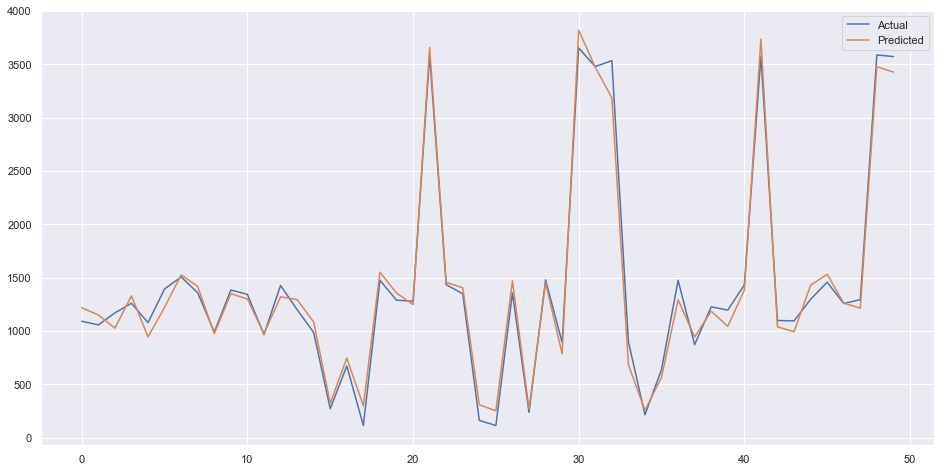

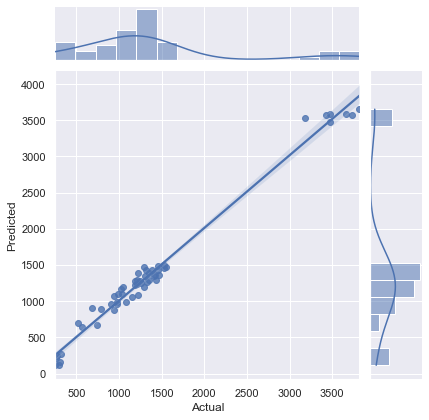

In [60]:
#Overview how much the prediction and the actual values differ:
y_pred= reg.predict(x_test)
test=pd.DataFrame({'Predicted':y_pred, 'Actual':y_test})
fig=plt.figure(figsize=(16,8))
test=test.reset_index()
test=test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg');

## 4.2 Evaluation

In [61]:
df_pf

,Predictions,Targets
0,1091.364516,1218
1,1057.719388,1151
2,1170.036887,1027
3,1259.987262,1330
4,1078.100005,945
5,1394.956731,1223
6,1506.660989,1526
7,1358.148148,1418
8,990.063854,975
9,1384.551075,1350


In [62]:
df_pf['Residuals'] = df_pf['Targets']-df_pf['Predictions']
df_pf

,Predictions,Targets,Residuals
0,1091.364516,1218,126.635484
1,1057.719388,1151,93.280612
2,1170.036887,1027,-143.036887
3,1259.987262,1330,70.012738
4,1078.100005,945,-133.100005
5,1394.956731,1223,-171.956731
6,1506.660989,1526,19.339011
7,1358.148148,1418,59.851852
8,990.063854,975,-15.063854
9,1384.551075,1350,-34.551075


In [63]:
#Residuals shows the deviation
#Display difference in percent for Prediction & Target
df_pf['Difference%']=np.absolute(df_pf['Residuals']/df_pf['Targets']*100)
df_pf

,Predictions,Targets,Residuals,Difference%
0,1091.364516,1218,126.635484,10.397002
1,1057.719388,1151,93.280612,8.104310
2,1170.036887,1027,-143.036887,13.927642
3,1259.987262,1330,70.012738,5.264116
4,1078.100005,945,-133.100005,14.084657
5,1394.956731,1223,-171.956731,14.060240
6,1506.660989,1526,19.339011,1.267301
7,1358.148148,1418,59.851852,4.220864
8,990.063854,975,-15.063854,1.545011
9,1384.551075,1350,-34.551075,2.559339


In [64]:
df_pf.describe()

,Predictions,Targets,Residuals,Difference%
count,54.000000,54.000000,54.000000,54.000000
mean,1388.186984,1379.592593,-8.594392,10.443333
std,929.385603,918.172272,112.470052,12.721770
min,114.034467,252.000000,-348.709964,0.169276
25%,971.752318,952.250000,-87.398366,3.485480
50%,1258.585532,1220.500000,-0.531383,6.941653
75%,1431.242466,1426.250000,73.674190,12.650153
max,3653.514821,3820.000000,184.390782,61.669158
